# Market, Category & Channel Trends
## Business Question

## How is the FMCG market evolving across regions and channels?

## Import Libraries

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load Data

In [3]:
# load data
df = pd.read_parquet("fmcg_cleaned.parquet")

# Market Revenue Trend


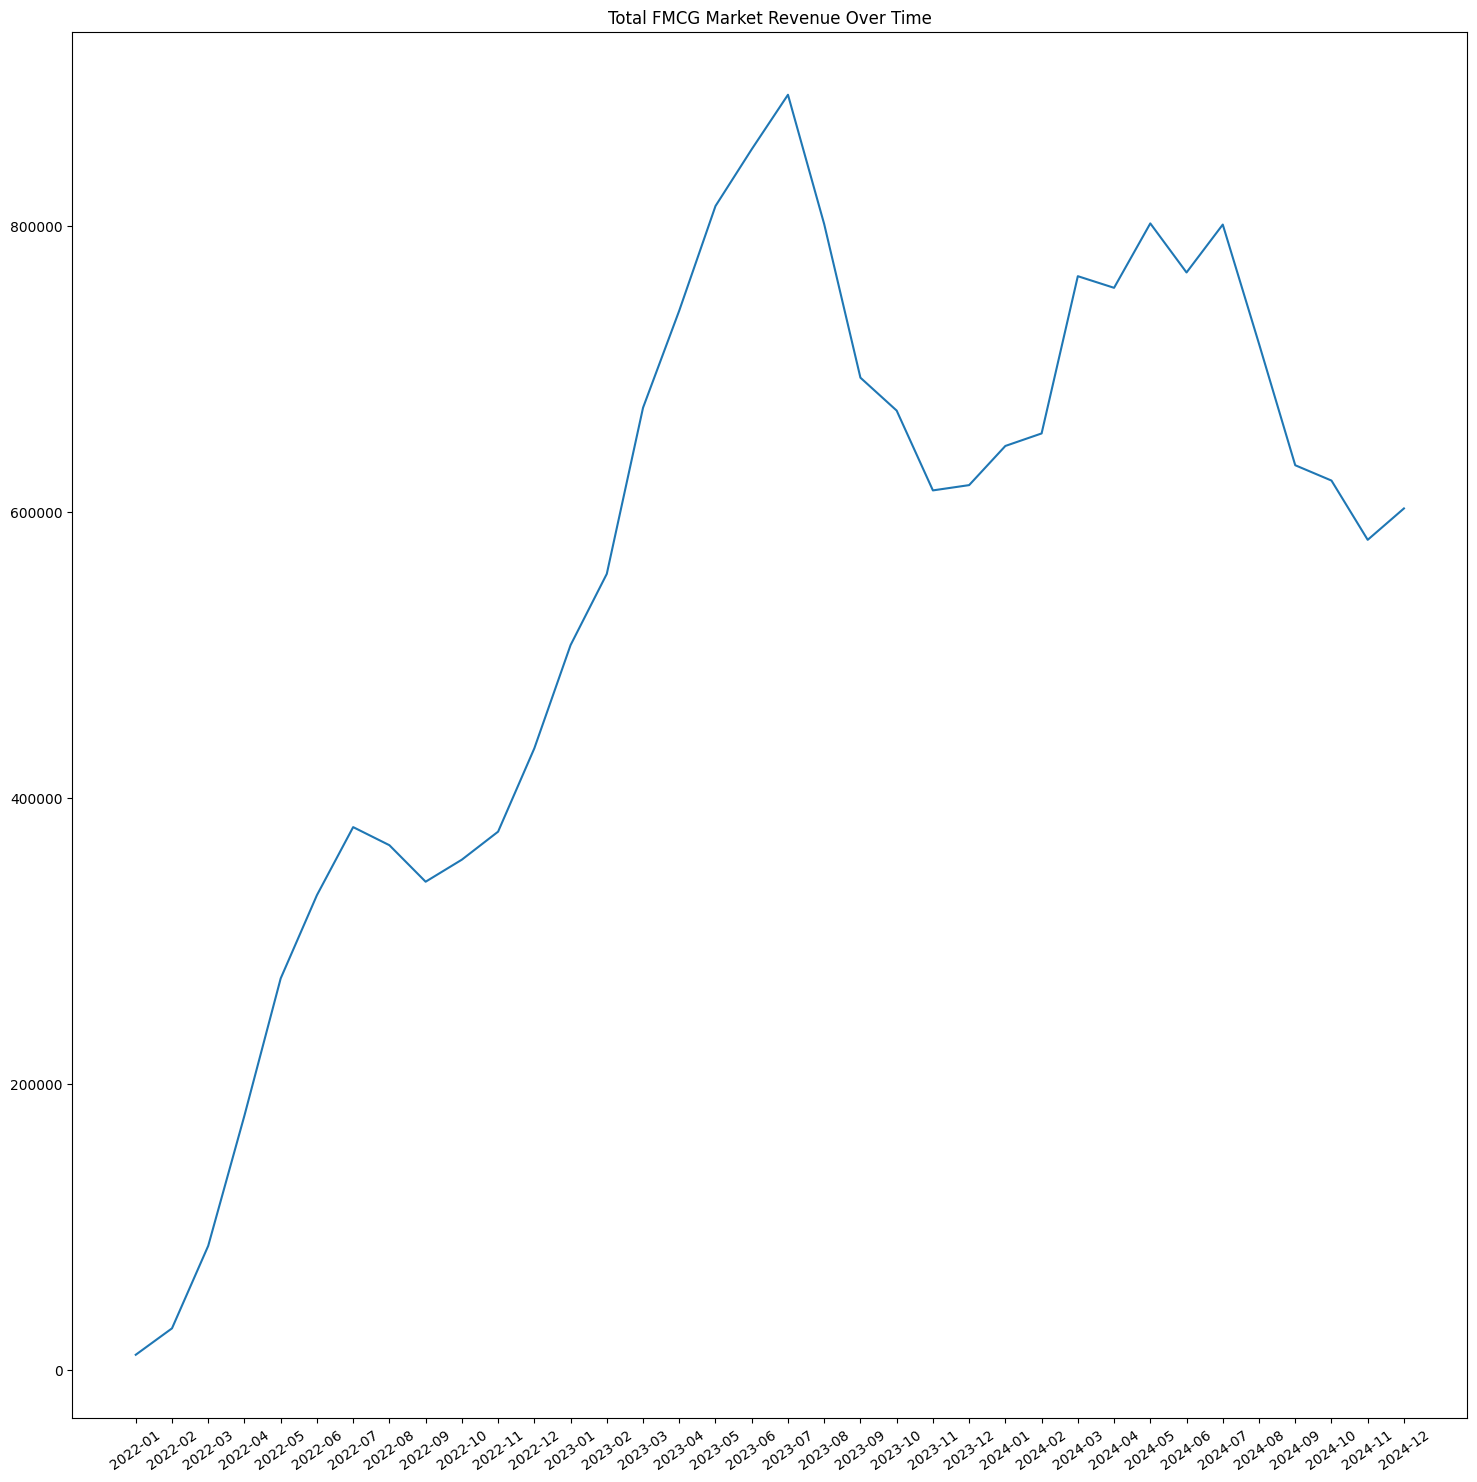

In [9]:
market_trend = df.groupby('month')['revenue'].sum().reset_index()

plt.figure(figsize=(18,18))
plt.plot(market_trend['month'].astype(str), market_trend['revenue'])
plt.xticks(rotation=35)
plt.title("Total FMCG Market Revenue Over Time")
plt.show()


# Category Growth (YOY)

In [10]:
#category growth
category_year = (
    df.groupby(['year','category'])['revenue']
      .sum()
      .reset_index()
)

pivot = category_year.pivot(index='category', columns='year', values='revenue')

pivot['growth_pct'] = (pivot[2024] - pivot[2023]) / pivot[2023] * 100
pivot.sort_values('growth_pct', ascending=False)


year,2022,2023,2024,growth_pct
category,,,,
Yogurt,1517019.29,3325190.70,3383983.32,1.768098
Milk,760217.20,1674337.60,1660820.62,-0.807303
SnackBar,107251.12,1656478.94,1637619.23,-1.138542
ReadyMeal,640350.45,1509342.07,1426655.54,-5.478316
Juice,142123.45,271127.98,239025.84,-11.840217


# Channel Performance

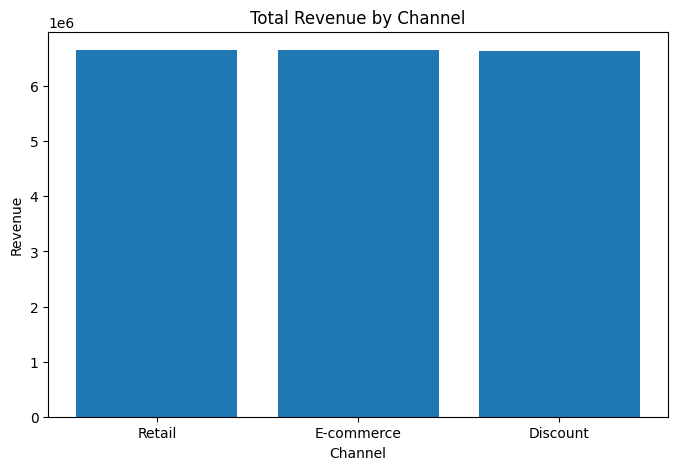

      channel  total_revenue
2      Retail     6655807.06
1  E-commerce     6653435.41
0    Discount     6642300.88


In [19]:
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

channel_perf = (
    df.groupby('channel', as_index=False)
      .agg(total_revenue=('revenue', 'sum'))
      .sort_values('total_revenue', ascending=False)
)

plt.figure(figsize=(8, 5))
plt.bar(channel_perf['channel'], channel_perf['total_revenue'])
plt.title('Total Revenue by Channel')
plt.xlabel('Channel')
plt.ylabel('Revenue')
plt.show()

print(channel_perf)




# Insights
## Revenue performance is evenly distributed across Retail, E-commerce, and Discount channels, suggesting a resilient and well-balanced channel strategy.